# Plots for validated Data 

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
from pandas import json_normalize
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context="paper", rc={"text.usetex": True, "font.family": "Times New Roman"})
def configure_axes(ax):
    def set_x_label(label, size=18, labelpad=5):
        ax.set_xlabel(label, size=size, labelpad=labelpad, loc="right", fontname='serif')
    def set_y_label(label, size=18, labelpad=5):
        ax.set_ylabel(label, size=size, labelpad=labelpad, loc="top", fontname='serif')
    ax.set_x_label = set_x_label
    ax.set_y_label = set_y_label
    ax.minorticks_on() 
    ax.tick_params(direction='in', length=10, width=1.1, colors='black', which='major', top=True, right=True)
    ax.tick_params(direction='in', length=5, width=0.6, colors='black', which='minor', top=True, right=True)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_linewidth(1.2)
    sns.despine(left=False, bottom=False, right=False, top=False, offset=None, trim=False)
    ax.tick_params(axis='x', labelcolor='black', labelsize=16)
    ax.tick_params(axis='y', labelcolor='black', labelsize=16)
def configure_cbar(cbar, label, size=20, labelpad=5):
    cbar.set_label(label, size=size, labelpad=labelpad, fontname='serif')
    cbar.ax.tick_params(labelsize=18)
    for spine in cbar.ax.spines.values():
        spine.set_linewidth(1.2)
from scipy.interpolate import griddata
from scipy.interpolate import interp1d



In [2]:
dataDF = pd.read_csv('TRPS1.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 3)
pd.set_option('display.float_format', '{:e}'.format)
dataDF


,Unnamed: 0,filename,mass.52,mass.54,mass.5000001,mass.9000002,mass.9000003,mass.9000004,width.54,width.5000001,width.9000002,width.9000003,width.9000004,extpar.1,extpar.2,extpar.3,extpar.4,extpar.5,extpar.6,extpar.7,extpar.8,extpar.9,extpar.10,extpar.11,extpar.12,extpar.13,extpar.14,extpar.15,extpar.16,extpar.17,extpar.18,extpar.19,extpar.20,extpar.21,extpar.22,extpar.23,extpar.24,extpar.25,xsec13TeV(fb).54,"BRs.y0.t-,t+","BRs.y0.xd~,xd",totalxsec13TeV(fb),totalxsec8TeV(fb),SMS Decomposition,Total xsec for missing topologies (fb),Total xsec for missing topologies with displaced decays (fb),Total xsec for missing topologies with prompt decays (fb),Total xsec for topologies outside the grid (fb),OutputStatus.sigmacut,OutputStatus.minmassgap,OutputStatus.maxcond,OutputStatus.ncpus,OutputStatus.model,OutputStatus.promptwidth,OutputStatus.stablewidth,OutputStatus.eraseprompt,OutputStatus.checkinput,OutputStatus.doinvisible,OutputStatus.docompress,OutputStatus.computestatistics,OutputStatus.testcoverage,OutputStatus.combinesrs,OutputStatus.reportallsrs,OutputStatus.experimentalfeatures,OutputStatus.file status,OutputStatus.decomposition status,OutputStatus.warnings,OutputStatus.input file,OutputStatus.database version,OutputStatus.smodels version,ExptRes.result0.maxcond,ExptRes.result0.theory prediction (fb),ExptRes.result0.upper limit (fb),ExptRes.result0.expected upper limit (fb),ExptRes.result0.TxNames,ExptRes.result0.Mass (GeV),ExptRes.result0.AnalysisID,ExptRes.result0.DataSetID,ExptRes.result0.AnalysisSqrts (TeV),ExptRes.result0.lumi (fb-1),ExptRes.result0.dataType,ExptRes.result0.r,ExptRes.result0.r_expected,ExptRes.result0.Width (GeV)
0,0,TRPS1_800_200_200.slha,2.000000e+02,8.000000e+02,1.000000e+01,9.118760e+01,7.982436e+01,7.982436e+01,6.963766e+01,0.000000e+00,2.495200e+00,2.085000e+00,2.085000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.177900e+02,6.041446e-01,3.958554e-01,2.177900e+02,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > inv)', 'Masses (GeV)'...",1.315767e+02,0.000000e+00,1.315767e+02,8.621335e+01,0.000000e+00,5,2.000000e-01,1,TRPS1/TRPS1_100_1_1.slha,5.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,0,Input file ok,TRPS1/TRPS1_800_200_200.slha,3.0.0,3.0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,106,TRPS1_950_300_300.slha,3.000000e+02,9.500000e+02,1.000000e+01,9.118760e+01,7.982436e+01,7.982436e+01,8.088763e+01,0.000000e+00,2.495200e+00,2.085000e+00,2.085000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.683300e+01,6.376920e-01,3.623080e-01,7.683300e+01,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > inv)', 'Masses (GeV)'...",4.899579e+01,0.000000e+00,4.899579e+01,2.783721e+01,0.000000e+00,5,2.000000e-01,1,TRPS1/TRPS1_100_1_1.slha,5.000000e+00,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,0,Input file ok,TRPS1/TRPS1_950_300_300.slha,3.0.0,3.0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Set r = 0 for points with no results 

In [3]:
#Set points without results with r == 0
dataDF.fillna(value={'ExptRes.result0.r' : 0.0},inplace=True)
#Sort points according to r value:weight_pb_obs


#### Define exclusions

In [4]:
#Add simple flag for excluded points:
dataDF['excludedLHC'] = dataDF['ExptRes.result0.r'] > 1.0


### Get points excluded:

In [5]:
excluded = dataDF[dataDF['excludedLHC'] == True]

allowed = dataDF[(dataDF['excludedLHC'] == False)]


print('Total number of points = %i' %len(dataDF))
print('Total excluded (LHC) = %i'%(len(excluded)))
print('Total allowed = %i\n'%(len(allowed)))

# print('Total excluded (r > %1.2f) = %i'%(rscale,len(excludedSC)))
# print('Total allowed (r > %1.2f) = %i'%(rscale,len(allowedSC)))weight_pb_obs


Total number of points = 107
Total excluded (LHC) = 7
Total allowed = 100



### Create analysis label for excluded points

In [6]:
anas = excluded['ExptRes.result0.AnalysisID'].value_counts()
anas.sort_values(inplace=True,ascending=False)

    
labels = []
for index, row in excluded.iterrows():
    ana = row['ExptRes.result0.AnalysisID']
    txList = sorted(row['ExptRes.result0.TxNames'])
    label = ana + ' (' + ','.join(txList) + ')'
    label = label.replace('off','') #Group together on and off-shell topologies
    labels.append(label)
excluded['label'] = labels


/tmp/ipykernel_32393/3923628249.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  excluded['label'] = labels


In [7]:
nexcluded = [[len(excluded[excluded['label'] == label]),label] for label in excluded['label'].unique()]
nexcluded = sorted(nexcluded,reverse=True)
nexcluded = np.array(nexcluded)
print(excluded.shape)


(7, 86)


In [8]:
for label in nexcluded[:,1]:
    print(label+': %i'%len(excluded[excluded['label'] == label]))
    

ATLAS-EXOT-2018-06 (',',1,P,R,S,T,[,]): 7


In [9]:
xo = dataDF['mass.54']
yo = dataDF['mass.52']
co = dataDF['ExptRes.result0.r']
order = co.argsort()
xo, yo, co = xo.iloc[order], yo.iloc[order], co.iloc[order]


### Define colors and plotting order

In [10]:
DataDF_Obs_DMP= pd.read_csv('../orig/HEPData-ins1847779-v1-csv/ContourobsDMP.csv', skiprows=7)
DataDF_Obs_DMP


,$m_{Z_{P}}$ [GeV],$m_{\chi}$ [GeV]
0,1.000000e+00,2.509000e+00
...,...,...
88,3.759000e+02,1.000500e+00


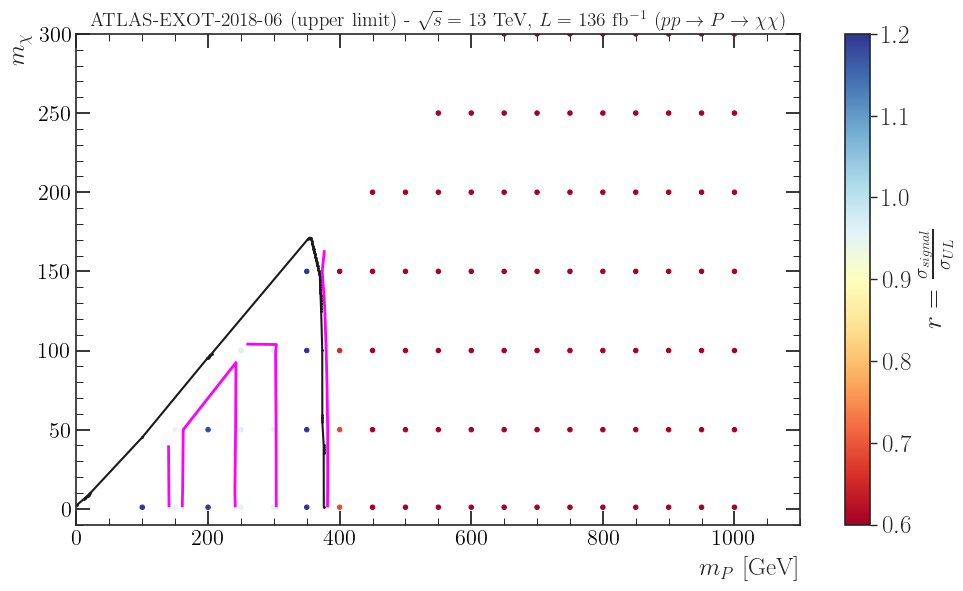

In [12]:
cm = plt.get_cmap('RdYlBu')
fig, ax = plt.subplots(figsize=(10, 6))
configure_axes(ax)
sc_o = plt.scatter(xo, yo, c=co, s=10, cmap=cm, vmin=6e-1, vmax=1.2e0)
observed_line, = ax.plot(DataDF_Obs_DMP.iloc[:, 0], DataDF_Obs_DMP.iloc[:, 1], color='k', marker='o', linestyle='-', linewidth=1.5, markersize=1, label='exclusion (official)')
levels = [1.0]  
cs = plt.tricontour(xo, yo, co, levels=levels, colors='magenta', linestyles='solid', linewidths=2.)
cbar = plt.colorbar(sc_o)
configure_cbar(cbar, label=r'$r = \frac{\sigma_{signal}}{\sigma_{U L}}$')
ax.set_x_label(r'$m_{P}$ [GeV]')
ax.set_y_label(r'$m_{\chi}$')
plt.xlim(0, 1100)
plt.ylim(-10, 300)
plt.title(r'ATLAS-EXOT-2018-06 (upper limit) -  $\sqrt{s} = 13$ TeV, $L = 136$ fb$^{-1}$  ($ p p \to P \to \chi \chi$)', fontsize=14) #- Leptophobic $P$ model (axial-vector)', fontsize=14)
plt.tight_layout()
plt.show()
